In [1]:
import sys
sys.path.append("..")

from pennylane import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from ChemModel import translator, quantum_net
from Arguments import Arguments
import random
import matplotlib.pyplot as plt
import csv, os
import pennylane as qml
from math import pi
import torch.nn as nn
import torch

In [2]:
def mask(net, positions = None):
    if positions:
         single = positions[0]
         two = positions[1]
         for i in single:
              net[i] = 'n'
         for i in two:
              net[12 + i] = 'n'
    else:
        mask = [random.sample(range(1, 12), 4), random.sample(range(12, 24), 6)]
        for i in range(2):
            for j in range(len(mask[i])):
                net[mask[i][j]] = 'n'
    return net

In [10]:
net = [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 7, 6, 3, 1, 1, 10, 6, 5, 6, 6, 7]
# net = mask(net, [[], [6]])   # [single, two]
print(net)

[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 3, 7, 6, 3, 1, 1, 'n', 6, 5, 6, 6, 7]


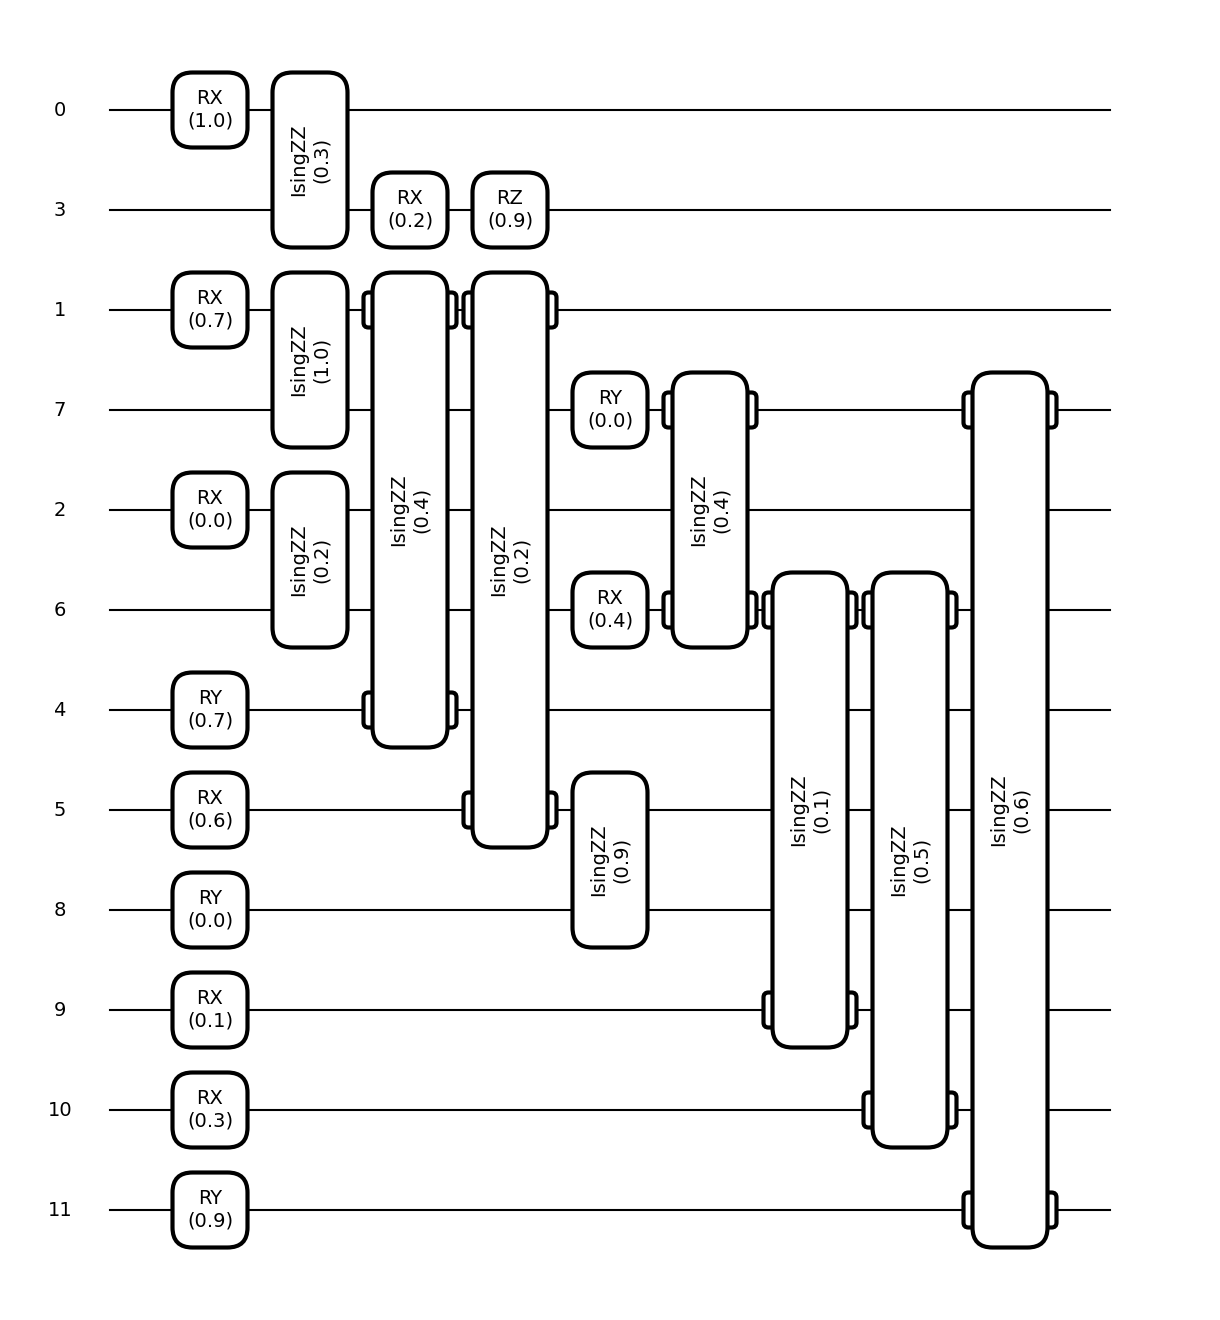

In [11]:
design = translator(net)
weight = nn.Parameter(torch.rand(design['layer_repe'] * 12 * 2))
fig, _ = qml.draw_mpl(quantum_net, decimals=1, style="black_white", fontsize="x-small")(weight, design = design)
plt.savefig('net.jpg')